In [38]:
# 1.加载库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = 'SimHei' # 显示中文设置
%matplotlib inline

In [5]:
# 2.加载数据
data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail3')

In [22]:
# 3.数据预处理（合并数据）
data = pd.concat([data1, data2, data3], axis=0) # 0表示按照行拼接数据
# data.head() # 查看表前几行，默认五行
data.dropna(axis=1, inplace=True) # inplace表示是否在原始数据上进行修改
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [21]:
# 4.统计卖出菜品的平均价格
round(data['amounts'].mean(),2) # 方法一：pd自带函数
round(np.mean(data['amounts']), 2) # 方法二：numpy函数处理，数据量大的花用这个，用为底层是c

44.82

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


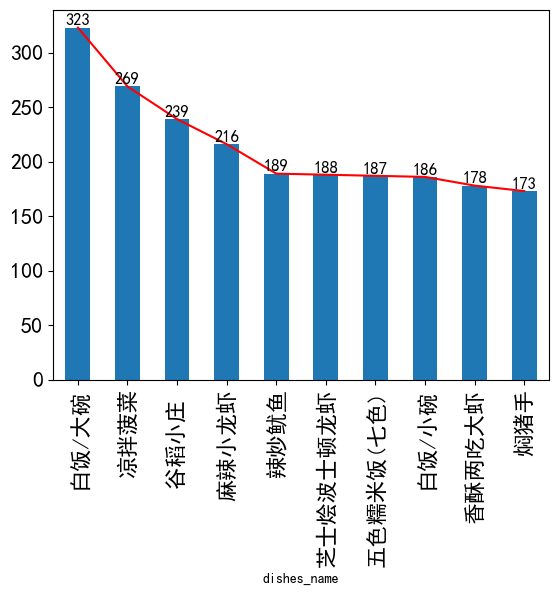

In [52]:
# 频数统计（什么菜最受欢迎） 对菜名进行频数统计，取最大前10名
dishes_count = data['dishes_name'].value_counts()[:10]
# dishes_counts

# 4.数据可视化
# dishes_counts.shape
dishes_count.plot(kind='line', color=['r'])
dishes_count.plot(kind='bar',fontsize=16)
for x,y in enumerate(dishes_count):
    print(x, y)
    plt.text(x,y+2,y,ha='center',fontsize=12)

Text(0, 0.5, '点菜种类')

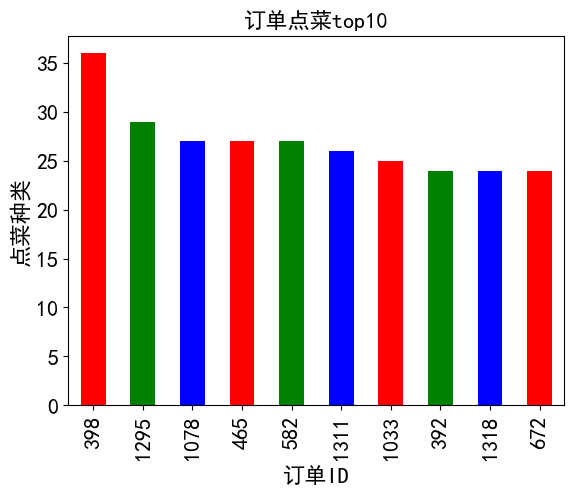

In [72]:
# 订单点菜的种类最多
data_group_by_id = data['order_id'].value_counts()[:10]
data_group_by_id.plot(kind='bar', fontsize=16, color=['r', 'g', 'b'])
plt.title('订单点菜top10', fontsize=16)
plt.xlabel('订单ID', fontsize=16)
plt.ylabel('点菜种类', fontsize=16)

Text(0.5, 1.0, '订单ID与点菜数量的关系')

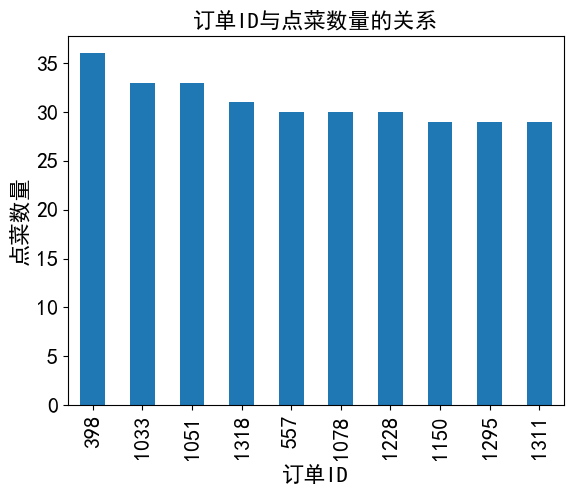

In [84]:
# 订单ID点菜数量top10（分组order_id, counts求和，排序，前十）
data['total_amounts'] = data['counts']*data['amounts'] # 统计单道菜消费总额
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum() # 分组求和
sort_count = Group_sum.sort_values(by='counts',ascending=False)
sort_count['counts'][:10].plot(kind='bar', fontsize=16)
plt.xlabel('订单ID', fontsize=16)
plt.ylabel('点菜数量', fontsize=16)
plt.title('订单ID与点菜数量的关系', fontsize=16)

Text(0.5, 1.0, '消费金额前10')

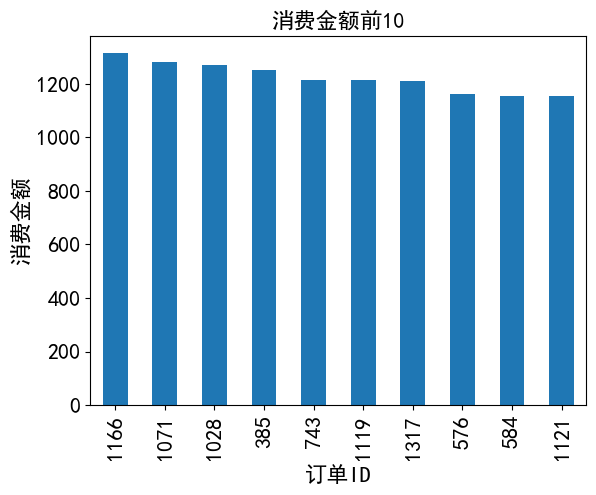

In [94]:
# 哪个订单ID消费最大（排序，前十）
sort_total_amounts = Group_sum.sort_values(by='total_amounts', ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar', fontsize=16)
plt.xlabel('订单ID', fontsize=16)
plt.ylabel('消费金额', fontsize=16)
plt.title('消费金额前10', fontsize=16)

Text(0.5, 1.0, '消费平均金额前10')

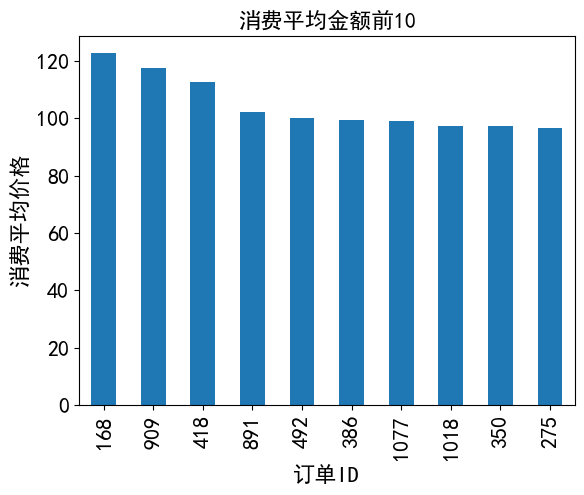

In [106]:
# 订单平均消费金额
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by='average', ascending=False)[:10]
sort_average['average'].plot(kind='bar', fontsize=16)
plt.xlabel('订单ID', fontsize=16)
plt.ylabel('消费平均价格', fontsize=16)
plt.title('消费平均金额前10', fontsize=16)

Text(0.5, 1.0, '下单数与小时的关系')

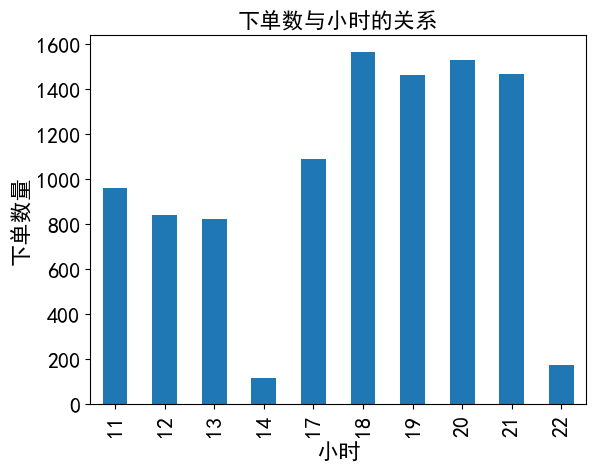

In [120]:
# 一天中什么时间段点菜量多（hour）
data['hourcount'] = 1 # 添加新列 用作计数
data['time'] = pd.to_datetime(data['place_order_time']) #将时间转换成时间类型存储
data['hour'] = data['time'].map(lambda x:x.hour)
group_by_hour = data.groupby(by='hour').count()['hourcount']
group_by_hour.plot(kind='bar', fontsize=16)
plt.xlabel('小时', fontsize=16)
plt.ylabel('下单数量', fontsize=16)
plt.title('下单数与小时的关系', fontsize=16)

Text(0.5, 1.0, '下单数与日期的关系')

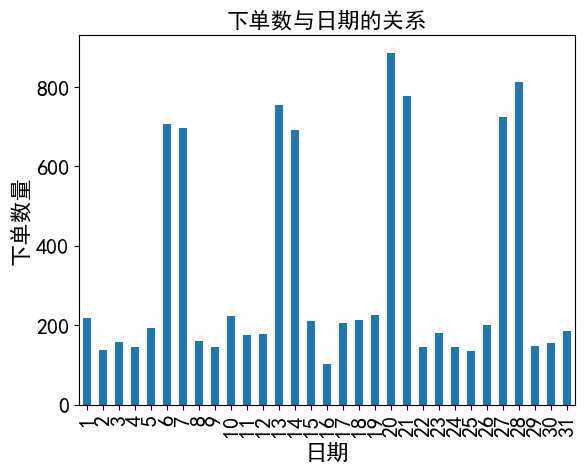

In [125]:
# 解析那一天订餐数量最多
data['daycount'] = 1 # 添加新列 用作计数
data['day'] = data['time'].map(lambda x:x.day)
group_by_day = data.groupby(by='day').count()['hourcount']
group_by_day.plot(kind='bar', fontsize=16)
plt.xlabel('日期', fontsize=16)
plt.ylabel('下单数量', fontsize=16)
plt.title('下单数与日期的关系', fontsize=16)

Text(0.5, 1.0, '下单数与星期的关系')

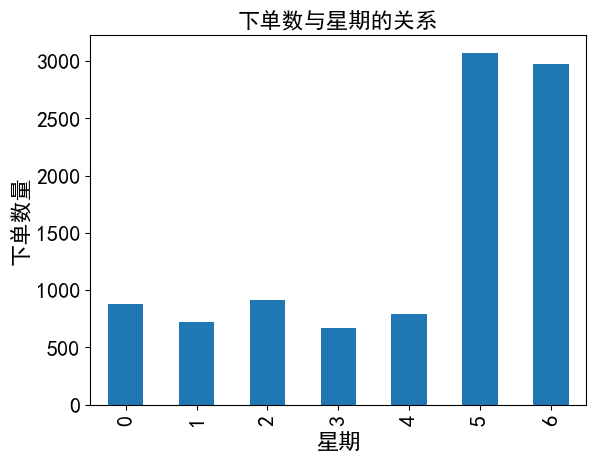

In [128]:
# 查看星期几人数最多
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())
group_by_weekday = data.groupby(by='weekday').count()['weekcount']
group_by_weekday.plot(kind='bar', fontsize=16)
plt.xlabel('星期', fontsize=16)
plt.ylabel('下单数量', fontsize=16)
plt.title('下单数与星期的关系', fontsize=16)